# Statistical Data Analysis for my Capstone project 

In [38]:
#Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [14]:
#Import data
hr_data1= pd.read_csv(r'C:\Users\HappyPC\Desktop\Datascience\Springboard\Project1_hr_analytics\train_data_hr.csv')

In [5]:
#Do some EDA on my dataset
hr_data1.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [6]:
hr_data1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
hr_data1.info()
#Seems as I have a preety big data set (54807 rows) I can go for Frequentiest Inference approach

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [21]:
hr_data1.isna().any()
# Seems I have NULLs for Education and Previous Year Rating.
#Lets take care of null values first before I go for Inference

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [8]:
#I will fill them up with most frequest occuring values

hr_data1['education_isnull'] = hr_data1['education'].isnull().astype(int)
hr_data1['education_isnull'].value_counts()

0    52399
1     2409
Name: education_isnull, dtype: int64

In [9]:
hr_data1['previous_year_rating_isnull'] = hr_data1['previous_year_rating'].isnull().astype(int)
hr_data1['previous_year_rating_isnull'].value_counts()

0    50684
1     4124
Name: previous_year_rating_isnull, dtype: int64

In [10]:
most_freq_edu = hr_data1['education'].value_counts().sort_values(ascending = False).index[0]
most_freq_edu

"Bachelor's"

In [11]:
hr_data1['education']= hr_data1['education'].fillna(most_freq_edu)

In [12]:
most_freq_pry_rtng = hr_data1['previous_year_rating'].value_counts().sort_values(ascending = False).index[0]
most_freq_pry_rtng

3.0

In [13]:
hr_data1['previous_year_rating']= hr_data1['previous_year_rating'].fillna(most_freq_pry_rtng)

In [31]:
hr_data1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_isnull,previous_year_rating_isnull
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0,0


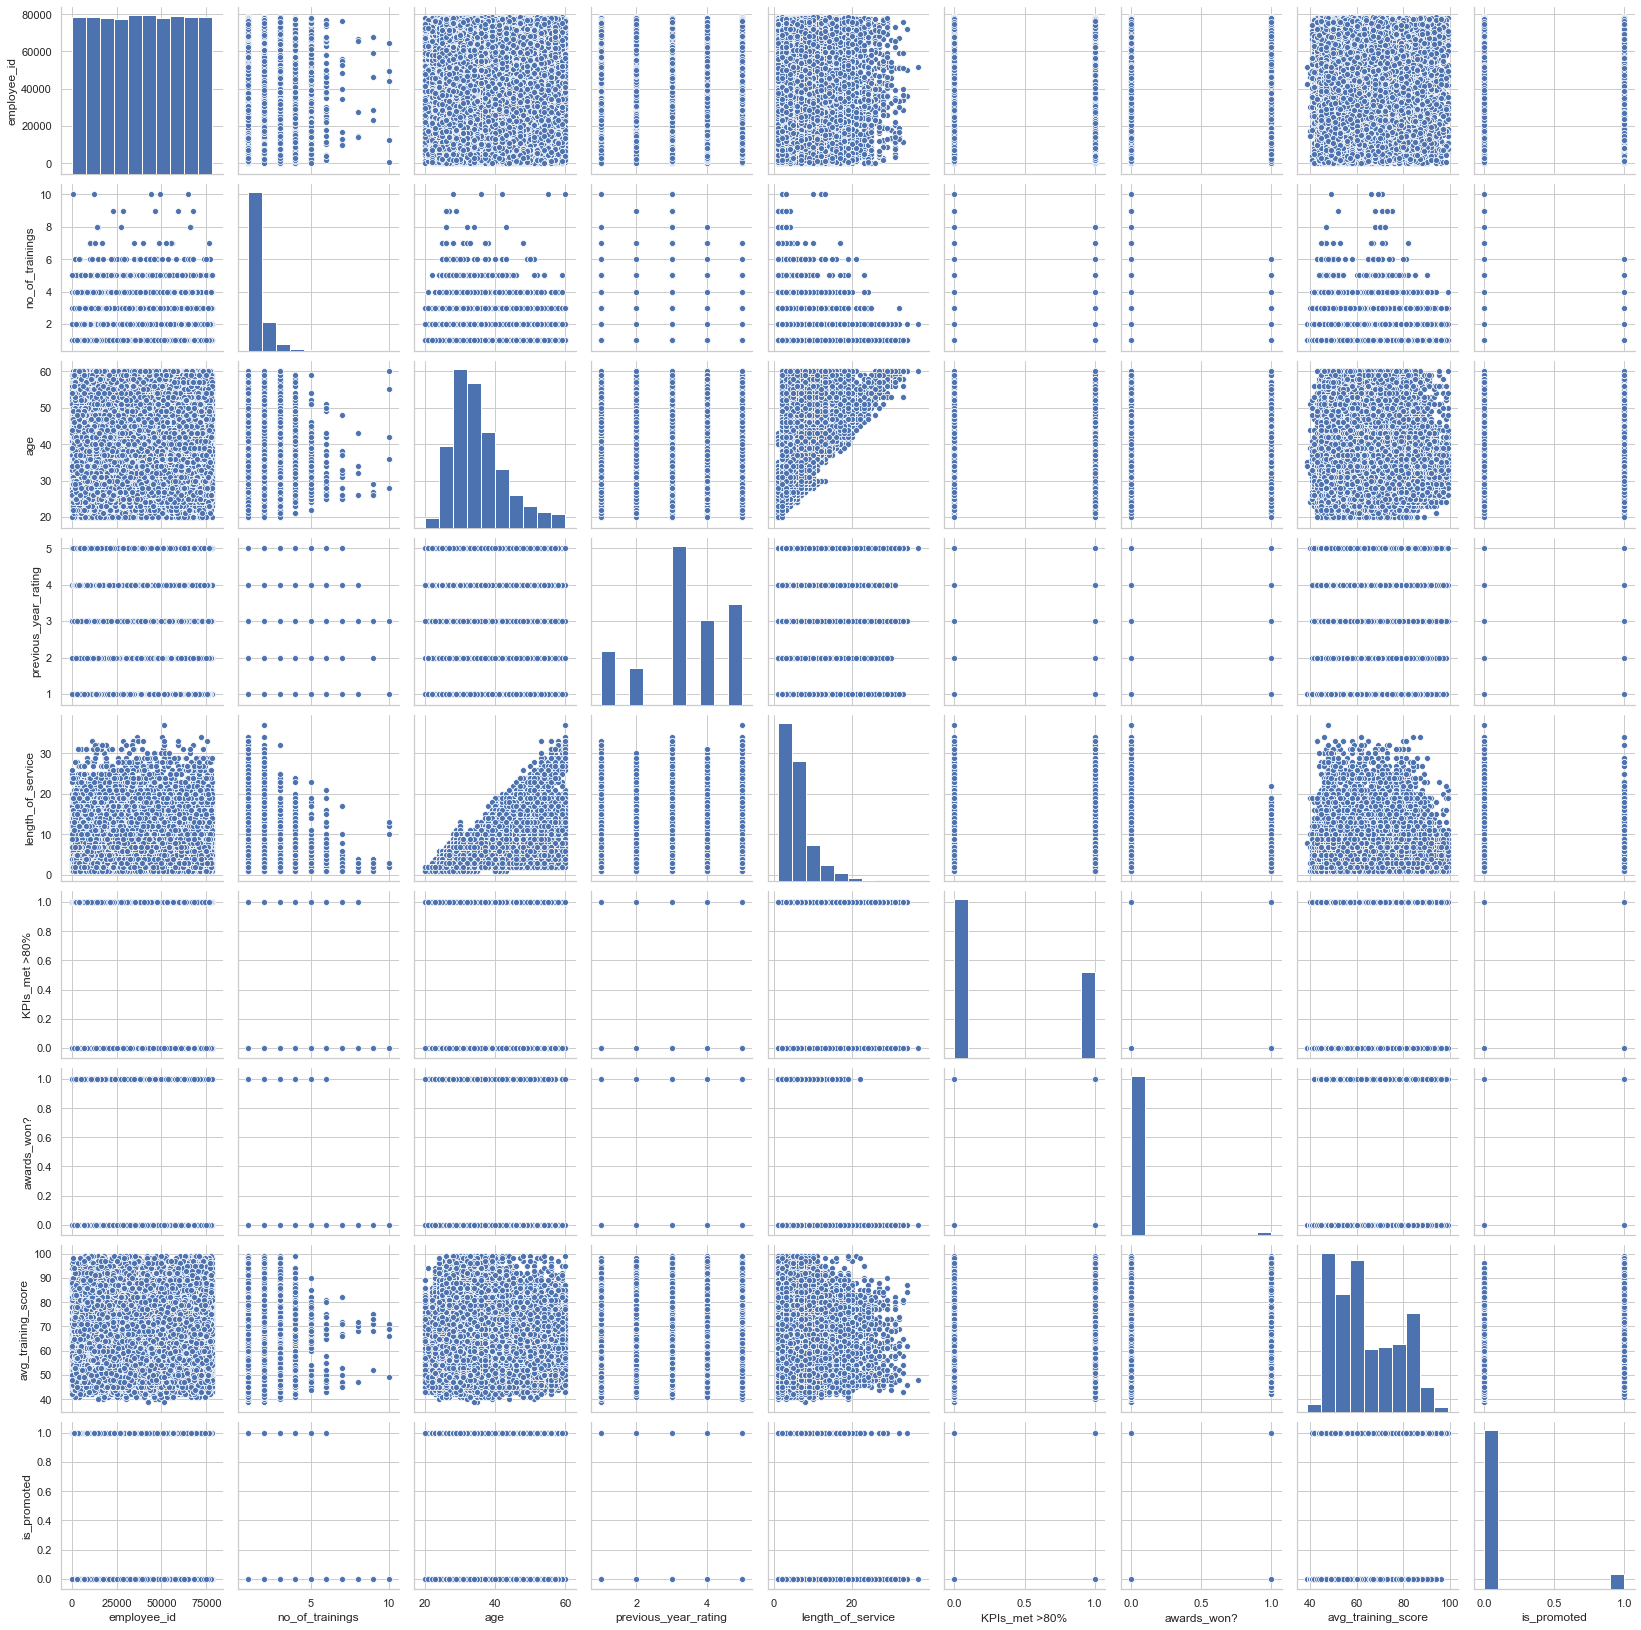

In [17]:
#Lets do a pair plot to get some idea in variable correlations 
sns.pairplot(hr_data1)

# My first NULL Hypothesis
# Being trained has no influence on if someone meets KPI > 80 %

Text(0, 0.5, 'KPI Met > 80%')

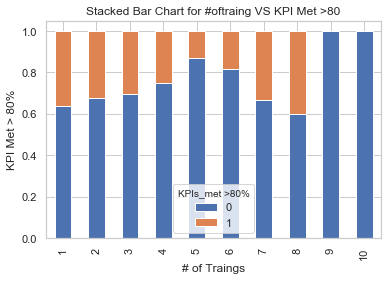

In [30]:
#Lets see how they are stacked
#Visualize how education impacts promotion #department,region,education,gender,recruitment_channel
table = pd.crosstab(hr_data1.no_of_trainings,hr_data1['KPIs_met >80%'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for #oftraing VS KPI Met >80')
plt.xlabel('# of Traings')
plt.ylabel('KPI Met > 80%')

In [226]:
#Lets get population % for each training where KPI >80 was met
hr_data2 = hr_data1[hr_data1['KPIs_met >80%'] ==1]
tr_pop= hr_data2.groupby('no_of_trainings')[['KPIs_met >80%']].count().apply(lambda x:  x/float(x.sum())).reset_index()
print(tr_pop['KPIs_met >80%'].tolist())
print (tr_pop['no_of_trainings'].tolist())

[0.8309056036493702, 0.13332642164740033, 0.028044165673111812, 0.006116842050697216, 0.0008812399564563786, 0.0004147011559794723, 0.00020735057798973615, 0.00010367528899486807]
[1, 2, 3, 4, 5, 6, 7, 8]


In [227]:
#It could be possible of high KPI>80% successrate for training 1 as it has high population.(83 %)
hr_data2.groupby('no_of_trainings')[['KPIs_met >80%']].sum()

,KPIs_met >80%
no_of_trainings,
1,16029
2,2572
3,541
4,118
5,17
6,8
7,4
8,2


In [218]:
#Let write a simulation function for sample proportion of population above 
def simulate(n):
    return pd.DataFrame({'NOfTraining': np.random.choice(tr_pop['no_of_trainings'].tolist(),size=n, p=tr_pop['KPIs_met >80%'].tolist())})

In [237]:
simulate(len(hr_data2)).NOfTraining.value_counts()
#Seems we are very close to what we observed

16054

In [238]:
#Lets get 10000 sampling distribution for training coun 1 
sampling = pd.DataFrame ({'counts' : [simulate(len(hr_data2)).NOfTraining.value_counts()[1] for i in range(10000)]})

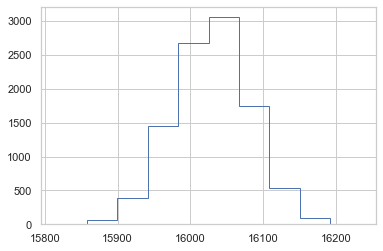

In [239]:
sampling.counts.hist(histtype = 'step')

In [240]:
scipy.stats.percentileofscore(sampling.counts,16029)

49.185

In [242]:
P_val = 100 - 49.185
P_val

50.815

# I get a very high P value so I accept this NULL Hypothesis

# My 2nd NULL Hypothesis
# Previous Year rating has no influence on if someone meets KPI > 80 %

Text(0, 0.5, 'KPI Met > 80%')

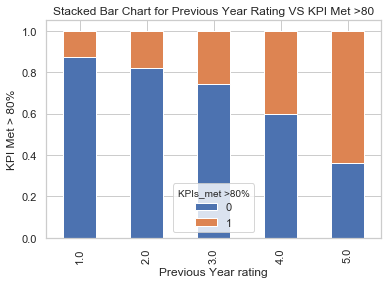

In [244]:
#Lets see how they are stacked
#Visualize how education impacts promotion #department,region,education,gender,recruitment_channel
table = pd.crosstab(hr_data1.previous_year_rating,hr_data1['KPIs_met >80%'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Previous Year Rating VS KPI Met >80')
plt.xlabel('Previous Year rating')
plt.ylabel('KPI Met > 80%')
#Seems we have strong correlation positive between Previous year rating and KPi >80%

In [259]:
#Lets see how population are distributed 
hr_data2.groupby('previous_year_rating')[['KPIs_met >80%']].count()

,KPIs_met >80%
previous_year_rating,
1.0,799
2.0,769
3.0,4808
4.0,3978
5.0,7495


In [254]:
#Lets pull out all who Met KPI > 80 %
yrRT_pop= hr_data2.groupby('previous_year_rating')[['KPIs_met >80%']].count().apply(lambda x:  x/float(x.sum())).reset_index()
print(yrRT_pop['KPIs_met >80%'].tolist())
print (yrRT_pop['previous_year_rating'].tolist())

[0.04476441257213289, 0.04308364614264104, 0.26937083309989357, 0.2228696285506191, 0.4199114796347134]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [255]:
#Let write a simulation function for sample proportion of population above 
def simulate(n):
    return pd.DataFrame({'Prv_year_rating': np.random.choice(yrRT_pop['previous_year_rating'].tolist(),size=n, p=yrRT_pop['KPIs_met >80%'].tolist())})

In [260]:
#Lets simulate the data and get distribution for rating 5
sampling = pd.DataFrame ({'counts' : [simulate(len(hr_data2)).Prv_year_rating.value_counts()[5] for i in range(10000)]})

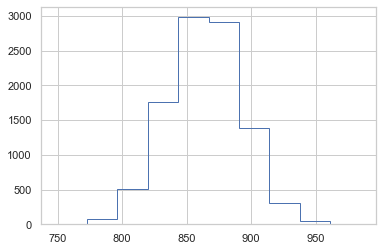

In [258]:
#Sample the distribution for rating 5
sampling.counts.hist(histtype = 'step')

In [261]:
scipy.stats.percentileofscore(sampling.counts,7495)

0.0

# I accept the NULL Hypothesis 2